# Extra trees feature scoring

## Import pacakages

In [2]:
from __future__ import (absolute_import, print_function, division,  unicode_literals)
from ema_workbench import (Model, RealParameter, ScalarOutcome, Constant, Policy, perform_experiments, ema_logging,
                           TimeSeriesOutcome, perform_experiments, save_results, load_results)
from ema_workbench.analysis import (feature_scoring)
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter, pairs_density)
from ema_workbench.connectors.vensim import (VensimModel) #LookupUncertainty, VensimModel, VensimModelStructureInterface)
from ema_workbench.em_framework import CategoricalParameter
from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis.plotting import lines, envelopes
from ema_workbench.analysis import clusterer, plotting, Density

from Figures import plot_lines_with_envelopes
from plotting_util import group_results, filter_scalar_outcomes,make_grid, make_legend
TIME_LABEL = 'Time'
from ema_workbench.analysis.plotting_util import prepare_data, COLOR_LIST, simple_kde, group_density,\
                                                 plot_envelope, simple_density, do_titles,\
                                                 do_ylabels, TIME
import ema_workbench.analysis.plotting_util as plt_util
from ema_workbench.analysis.plotting import group_by_envelopes, single_envelope, plot_lines_with_envelopes
from ema_workbench.analysis.pairs_plotting import pairs_scatter, pairs_density
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import (get_ex_feature_scores,
                                    RuleInductionType)

C:\ProgramData\Anaconda3_32bits\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\ProgramData\Anaconda3_32bits\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\ProgramData\Anaconda3_32bits\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\ProgramData\Anaconda3_32bits\lib\site-packages\ema_workbench\connectors\__init__.py:27: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)


In [1]:
import numpy as np
import seaborn as sns #; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import copy
from copy import deepcopy

import numpy as np
import datetime
import math
import matplotlib.gridspec as gridspec

import scipy.stats.kde as kde
from matplotlib.colors import ColorConverter
from matplotlib.collections import PolyCollection, PathCollection
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm
import matplotlib as mpl

## Set WD

In [ ]:
wd = 'C:/Users/erika/Desktop/EMA_runs/'
ema_logging.log_to_stderr(ema_logging.INFO)

## create or load results

In [ ]:
Cobalt_model.uncertainties = [
#     Switches
        CategoricalParameter('Switch opportunity cost fixed stock',(1,2),pff = True ),
        CategoricalParameter('Switch SSP', (1,2,3,4,5) ),
        CategoricalParameter('Switch carbon policy',(0,1) ),
        CategoricalParameter('Switch energy price growth scenario', (1,2,3) ),
        CategoricalParameter('Switch real price', (1,2)),
#     Assumptions metal stocks
        RealParameter('Percentage lost during artisanal mining',0.4 ,0.6 ),
        RealParameter('Part artisanal mining from classified reserves',0.1 ,0.3 ),
        RealParameter('Administration time',10 ,20 ),
        RealParameter('Average time mining until refining',0.09 ,0.11 ),
        RealParameter('Average time scrap to recycling',0.38 ,0.42 ),
        RealParameter('Maximum recycling efficiency score',0.8 ,0.99 ),
        RealParameter('Yearly increase recyclying efficiency score', 0.03, 0.07 ),
        RealParameter('Recycling efficiency score in 2018', 0.4,0.6),
        RealParameter('Percentage of primary scrap',0.25 ,0.4 ),
        RealParameter('Average lifetime of metal in use',5 ,15 ),
        RealParameter('Collection rate metal products',0.4 ,0.8 ),
        RealParameter('Short forecasting period', 0.5,2 ),
        CategoricalParameter('Delay order consumption forecast',(1,3,5) ),
        RealParameter('Minimum usage mining capacity', 0.7,0.9),
        RealParameter('Minimum usage smelting and refining capacity', 0.7,0.9),
        RealParameter('Percentage lost during operations', 0.04, 0.08),
#     Assumptions industrial and artisanal mining capacity
        RealParameter('Mining usage investment cap',0 ,0.95 ),
        CategoricalParameter('Delay order production capacity',(1,3,5) ),
        RealParameter('Average permit term', 5 , 15 ),
        RealParameter('Smelter and refiner usage investment cap', 0, 0.95), 
        RealParameter('Percentage of profit from refined cobalt for artisanal miners', 0.04, 0.1),
        RealParameter('Productivity of artisanal mining', 800, 1600),
        RealParameter('Minimum cost of artisanal mining', 800, 1300),
        RealParameter('Maximum increase recovery rate', 0.05, 0.25),
#     Assumptions Demand
        RealParameter('Ni per dollar GDP', 0.000004, 0.000008 ),
        RealParameter('Co per dollar GDP', 0.000001, 0.0000015 ),
        RealParameter('Cu per dollar GDP', 0.000025, 0.000035 ),
        RealParameter('Period for long term effect on demand', 5,15),
        RealParameter('Copper substitution threshold', 3,5),
        RealParameter('Nickel substitution threshold', 5,9),
        RealParameter('Cobalt substitution threshold', 5,7),
        RealParameter('Long term substitution strength',0.1, 0.15),
        RealParameter('Short term substitution strength', 0.02, 0.06),
        RealParameter('Substitution strength battery compared to traditional', 0.01,0.05),
#     Assumptions Battery transition
        RealParameter('Increase in demand stationary storage', 0.2 , 0.4),
        RealParameter('Slowing of increase in demand stationary storage', 0.88 , 0.96),
        RealParameter('Battery capacity PHEV', 8 , 17),
        RealParameter('Battery capacity BEV', 20 , 40),
        RealParameter('Number of cars per dollar GDP', 1.369e-006, 2.369e-006),
        RealParameter('Battery capacity Ebus',150, 220 ),
        RealParameter('Number of buses per person',0.001, 0.002),
        RealParameter('Battery capacity Etruck', 60, 100),
#     Assumptions Economics
        RealParameter('Percentage cost on top of marginal cost', 0.05 , 0.25 ),
        RealParameter('Price elasticity long term', 0.1 , 0.25),
        RealParameter('Price elasticity short term', 0.02, 0.08),
        RealParameter('Price amplifying factor', 0.5 , 3),
        RealParameter('Cobalt taxes in DRC', 0.3, 0.8),
        RealParameter('Marginal cost bottom price relationship copper', 0.01, 0.015),
        RealParameter('Marginal cost bottom price relationship nickel', 0.08, 0.12),
        RealParameter('Marginal cost bottom price relationship cobalt', 0.05,0.075),
        RealParameter('Exponent copper price curve',-1.6, -1.4),
        RealParameter('Exponent nickel price curve',-0.95, -0.85),
        RealParameter('Exponent cobalt price curve',-1.3, -1.1),
        RealParameter('Innovation in mining sector', 0.8 ,1 ),
        RealParameter('Relation ore grade energy usage copper',-1.05,-0.95 ),
        RealParameter('Relation ore grade energy usage nickel',-0.77, -0.67 ),
        RealParameter('Relation ore grade energy usage cobalt',-3.1, -2.9 ),
        RealParameter('Base energy usage copper', 0.075,0.085),
        RealParameter('Base energy usage nickel', 0.09, 0.13),
        RealParameter('Base energy usage cobalt', 0.09, 0.11),
        RealParameter('Transport costs copper', 0.02, 0.06),
        RealParameter('Transport costs nickel', 0.1, 0.3),
        RealParameter('Transport costs cobalt', 0.1, 0.3),
        RealParameter('Price averaging period', 0.1, 0.4),
        RealParameter('Power for oregrades', 0.38, 0.42 ),
        RealParameter('Maximum increase production capacity', 0.1, 0.2),
        RealParameter('Maximum decrease production capacity', 0.02, 0.05),
]
    
Cobalt_model.outcomes =  [
#     General
        TimeSeriesOutcome('TIME'),
#         TimeSeriesOutcome('Total demand[Copper]'),
#         TimeSeriesOutcome('Total demand[Nickel]'),
#         TimeSeriesOutcome('Total demand[Cobalt]'),
#         TimeSeriesOutcome('Marginal cost[Copper]'),
#         TimeSeriesOutcome('Marginal cost[Nickel]'),
#         TimeSeriesOutcome('Marginal cost[Cobalt]'),
#     Fixed Stock metrics
#         TimeSeriesOutcome('R over P ratio[Copper]'),
#         TimeSeriesOutcome('R over P ratio[Nickel]'),
        TimeSeriesOutcome('R over P ratio[Cobalt]'),
#         TimeSeriesOutcome('Exponential index of depletion[Copper]'),
#         TimeSeriesOutcome('Exponential index of depletion[Nickel]'),
#         TimeSeriesOutcome('Exponential index of depletion[Cobalt]'),
#     Opportunity Cost metrics
#         TimeSeriesOutcome('Real price[Copper]'),
#         TimeSeriesOutcome('Real price[Nickel]'),
        TimeSeriesOutcome('Real price[Cobalt]'),
#     Relative parts types of mining
        TimeSeriesOutcome('Relative part artisanal mining[Cobalt]'),
#         TimeSeriesOutcome('Artisanal ore trade[Cobalt]'),
#         TimeSeriesOutcome('Industrial Ore mining[Copper]'),
#         TimeSeriesOutcome('Industrial Ore mining[Nickel]'),
        TimeSeriesOutcome('Industrial Ore mining[Cobalt]'),
#         TimeSeriesOutcome('Relative part industrial mining[Copper]'),
#         TimeSeriesOutcome('Relative part industrial mining[Nickel]'),
#         TimeSeriesOutcome('Relative part industrial mining[Cobalt]'),
#         TimeSeriesOutcome('Relative part recycled scrap[Copper]'),
#         TimeSeriesOutcome('Relative part recycled scrap[Nickel]'),
#         TimeSeriesOutcome('Relative part recycled scrap[Cobalt]'),
#     Metal stocks
#         TimeSeriesOutcome('Resources[Copper]'),
#         TimeSeriesOutcome('Resources[Nickel]'),
#         TimeSeriesOutcome('Resources[Cobalt]'),
#         TimeSeriesOutcome('Reserve base[Copper]'),
#         TimeSeriesOutcome('Reserve base[Nickel]'),
#         TimeSeriesOutcome('Reserve base[Cobalt]'),
#         TimeSeriesOutcome('Recycling input rate[Copper]'),
#         TimeSeriesOutcome('Recycling input rate[Nickel]'),
#         TimeSeriesOutcome('Recycling input rate[Cobalt]'),
#         TimeSeriesOutcome('Smelting and refining capacity utilisation rate[Copper]'),
#         TimeSeriesOutcome('Smelting and refining capacity utilisation rate[Nickel]'),
#         TimeSeriesOutcome('Smelting and refining capacity utilisation rate[Cobalt]'),
#         TimeSeriesOutcome('Recycling efficiency score'),
# #     Industrial and artisanal mining capacity
#         TimeSeriesOutcome('Industrial mining capacity[Sed hosted Co]'),
#         TimeSeriesOutcome('Industrial mining capacity[Sed hosted]'),
#         TimeSeriesOutcome('Industrial mining capacity[Ni laterite Co]'),
#         TimeSeriesOutcome('Industrial mining capacity[Ni laterite]'),
#         TimeSeriesOutcome('Industrial mining capacity[Porphyry Cu]'),
#         TimeSeriesOutcome('Industrial mining capacity[Magm sulfide Co]'),
#         TimeSeriesOutcome('Industrial mining capacity[Magm sulfide]'),
#         TimeSeriesOutcome('Industrial mining capacity metals[Copper]'),
#         TimeSeriesOutcome('Industrial mining capacity metals[Nickel]'),
#         TimeSeriesOutcome('Industrial mining capacity metals[Cobalt]'),
#         TimeSeriesOutcome('Typical Co recovery rate[Sed hosted Co]'),
#         TimeSeriesOutcome('Typical Co recovery rate[Ni laterite Co]'),
#         TimeSeriesOutcome('Typical Co recovery rate[Magm sulfide Co]'),
#         TimeSeriesOutcome('Smelting and refining capacity[Copper]'),
#         TimeSeriesOutcome('Smelting and refining capacity[Nickel]'),
#         TimeSeriesOutcome('Smelting and refining capacity[Cobalt]'),
#         TimeSeriesOutcome('Population Katanga below poverty line'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Cobalt,Sed hosted Co]'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Copper,Sed hosted Co]'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Nickel,Ni laterite Co]'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Cobalt,Ni laterite Co]'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Copper,Magm sulfide Co]'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Nickel,Magm sulfide Co]'),
#         TimeSeriesOutcome('Percentage profit industrial mining capacity per metal[Cobalt,Magm sulfide Co]'),
    #     Demand
#         TimeSeriesOutcome('Total substitution[Copper]'),
#         TimeSeriesOutcome('Total substitution[Nickel]'),
#         TimeSeriesOutcome('Total substitution[Cobalt]'),
#         TimeSeriesOutcome('Postponed demand[Copper]'), 
#         TimeSeriesOutcome('Postponed demand[Nickel]'),
#         TimeSeriesOutcome('Postponed demand[Cobalt]'),
# #     Battery transition
#         TimeSeriesOutcome('Total battery capacity demand from cars'),
#         TimeSeriesOutcome('Battery capacity demand from Ebuses'),
#         TimeSeriesOutcome('Battery capacity demand from Etrucks'),
#         TimeSeriesOutcome('New consumer electronics capacity'),
#         TimeSeriesOutcome('Newly built stationary storage capacity'),
# #     Economics
#         TimeSeriesOutcome('Energy price'),
#         TimeSeriesOutcome('Energy costs mining[Copper]'),
#         TimeSeriesOutcome('Energy costs mining[Nickel]'),
#         TimeSeriesOutcome('Energy costs mining[Cobalt]'),
#         TimeSeriesOutcome('Normalised profit forecast[Copper]'),
#         TimeSeriesOutcome('Normalised profit forecast[Nickel]'),
#         TimeSeriesOutcome('Normalised profit forecast[Cobalt]'),
# #     SSPs
#         TimeSeriesOutcome('World population'),
#         TimeSeriesOutcome('Population growth'),
#         TimeSeriesOutcome('GDP per capita growth per year'),
#         TimeSeriesOutcome('World GDP growth per year'),
]

In [4]:
results = load_results('C:/Users/erika/Desktop/EMA_runs/30000runs_pff2.tar.gz')

[MainProcess/INFO] results loaded succesfully from C:\Users\erika\Desktop\EMA_runs\30000runs_pff2.tar.gz


In [8]:
experiments,outcomes = results

## Define feature scoring functions

In [16]:
def get_ex_feature_scores_topx (variable,top_nr):
    x= experiments.drop(['model', 'policy'], axis=1)
    y = outcomes[variable]
    all_scores = []
    top_x = set()
    for i in range(2, y.shape[1], 8):
        data = y[:, i]
        scores = get_ex_feature_scores(x, data,
                                       mode=RuleInductionType.REGRESSION)[0]
        top_x |= set(scores.nlargest(top_nr, 1).index.values) 
        all_scores.append(scores)
    all_scores = pd.concat(all_scores, axis=1, sort=False)
    all_scores = all_scores.loc[top_x, :]
    return (all_scores)

In [50]:
def plot_heatmap_overtime (scores,title):
    sns.heatmap(scores, cmap='viridis')
    fig = plt.gcf()
    ax = fig.get_axes()
    ax[0].set_xticklabels(np.arange(2000, 2051, 2))
    fig.autofmt_xdate()
    fig.set_size_inches(15,5)
    fig.suptitle('Extra trees feature scores for variables with highest impact on '+title)
    shorttitle = title.replace(" ","")
    fig.savefig('C:/Users/erika/Google Drive/EPA/Thesis/Report/Thesis report/img/Extra_Trees_Featscores'+shorttitle)
    plt.show()

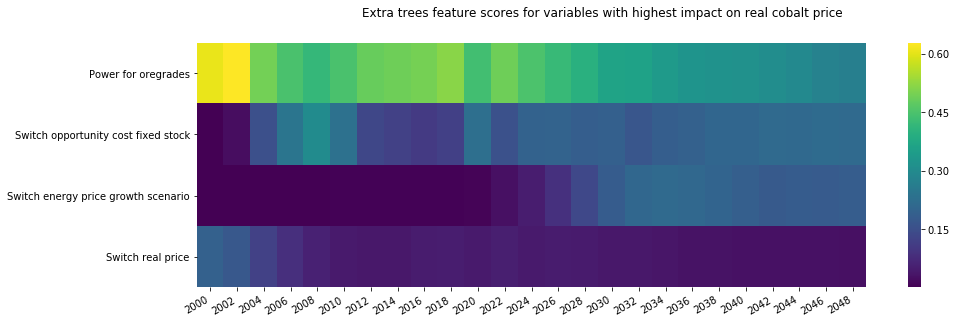

In [51]:
all_scores_price = get_ex_feature_scores_topx('Real price[Cobalt]',2)
plot_heatmap_overtime(all_scores_price,title =  'real cobalt price')


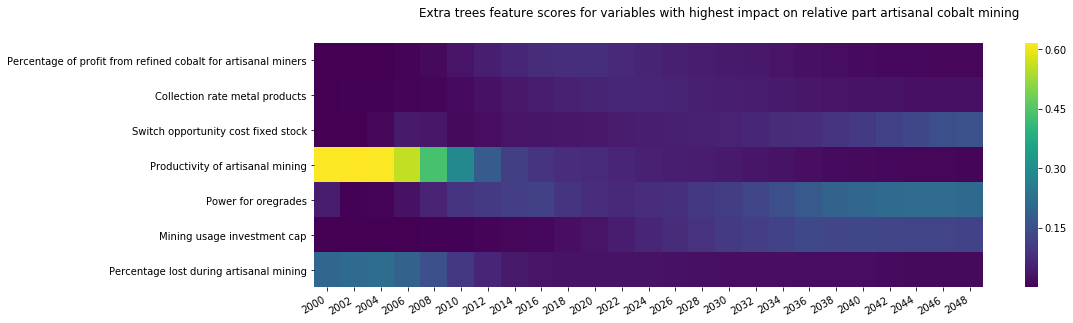

In [52]:
all_scores_artisanal = get_ex_feature_scores_topx('Relative part artisanal mining[Cobalt]',2)
plot_heatmap_overtime(all_scores_artisanal, title = 'relative part artisanal cobalt mining')

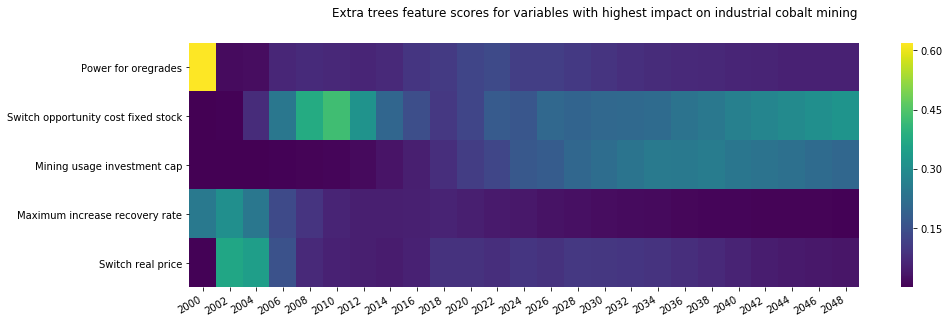

In [53]:
all_scores_mining = get_ex_feature_scores_topx('Industrial Ore mining[Cobalt]',2)
plot_heatmap_overtime(all_scores_mining,title = 'industrial cobalt mining')

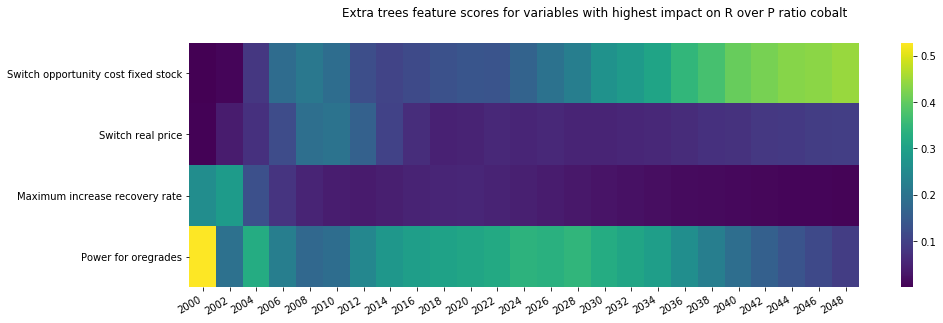

In [54]:
all_scores_RoverP = get_ex_feature_scores_topx('R over P ratio[Cobalt]',2)
plot_heatmap_overtime(all_scores_RoverP, title = 'R over P ratio cobalt')